# Introduction to Neural Networks

## Import packages

In [1]:
from keras.datasets import mnist
from keras.preprocessing.image import load_img, array_to_img
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load the data

 I want to be able to load the MNIST data set. So I type mnist and dot, and I Hit Tab, and this will give me the methods available with an MNIST. So I want to load the data. I Enter a Left and a Right Bracket. Now I have no idea what format the MNIST data will come in. So with the cursor within these two brackets, I'm going to Hit Shift + Tab Twice. And you can see that this tells me that what's returned when you Select Load Data, is a Tuple of Numpy arrays. Now there would be no way for me to know this without looking at this documentation.

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Understanding the image data format

In [4]:
X_train[0].shape

(28, 28)

f we look at the shape, we see that it's an image with dimensions 28 by 28. So why don't we plot this to see which digit this is?

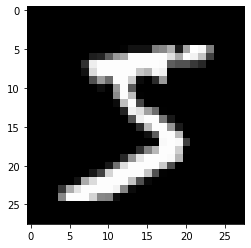

In [5]:
plt.imshow(X_train[0],cmap='gray');

In [6]:
y_train[0]

5

## Preprocessing the image data

 if we wanted to use this as our input to our neural network, we would need to reshape our image so that instead of it being a 28 by 28 image, we want to have a single line that is 784 across. So that's 28 by 28 which is 784. And so we can convert that, and so what we say is x_train.reshape and for the 60,000 entries, we want to reshape that to image height multiplied by image width, and this will give us one layer with 784 neurons across. 

In [7]:
image_height,image_width = 28,28

In [8]:
X_train = X_train.reshape(60000, image_height*image_width)
X_test = X_test.reshape(10000, image_height*image_width)
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


 We want to rescale our data from zero to one, as our original image is grayscale. So that means the value of the original pixels will be between zero and 255. But before we rescale our data, we will want to change the type to float so that there are no surprises when we divide by 255. 

In [9]:
print(X_train[0])
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

 And if I was to print out the first image, again... I would see that the values are now between zero and one as expected

In [10]:
X_train /= 255.0
X_test /= 255.0
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [11]:
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


 So we actually want the last layer to be one where we can send out the result, or output, into one of 10 bins, representing the digits zero to nine. And we can use that, using the two categorical function that we imported earlier. So let's use two categorical, which is the two categorical method on our Y train data, and this time, we want it to have 10 different bins. 

In [12]:
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


## Build a model

 So let's just visualize the model that we are trying to create, and remember that the reason that we're going from 784 nodes, that's the original number of pixels that we had, if you multiply 28 by 28. We then go down to 512 nodes in each of these layers, and then we need to go down to 10 nodes, because our output needs to be one of 10 digits, that's zero to nine, and that's why we end up with 10 nodes in our final output layer. 

![NeuralNet](images/neural-net.png)

In [13]:
model = Sequential()

In [14]:
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10,activation='softmax'))

we want to use a fully connected node, so we use dense. Now if you want to know the parameters that the dense mode is expecting, if we type a shift and a tab twice, you can see that it's expecting an output node. So we specify dense, we know that we're going to have 512 output nodes, we specify what activation function we want to use. So in this instance, I'm just going to use relu, and I need to specify my input shape. So my input shape is going to be my 784 pixels that I have for my image. So 784, and we've then created the first layer of our neural network model. We create the next layer by saying model add, dense, and then we know that the second layer's going to have 512 nodes. We use activation function of relu again, and this time we don't need to specify the input node because Keras is able to determine that, and we know that the number of input nodes is, in fact, 512. We add the final layer, which is our output layer, and we say model add dense, and our final layer will have an output of 10 nodes, and this time 'round, we will be using softmax as our activation function because we want, as our output, one of the 10 classes

## Compile the model

In [15]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [17]:
784*512+512

401920

In [18]:
512*512+512

262656

In [19]:
512*10+10

5130

Before we can train our model, we'll need to compile our model so let's do a model.compile and look at the options available to us. So I hit the shift and tab and I can see that I need to specify an optimizer, a loss function, and the metrics. So for an optimizer, we will use Adam as that is our go-to optimizer in general. For the loss function, we're going to be using categorical cross entropy. And the reason for this is because our output is going to be 10 classes or 10 bins and the categorical cross entropy allows for that. So crossentropy. And finally, we need to specify that the metrics is accuracy. We need to just confirm that our model is as we expect so we type model.summary. And we can see that our model has two layers, the first one with 512 nodes, the second layer also with 512 nodes, and the final layer, or the output layer, with 10 nodes. So let's talk a little bit about how we get the number of parameters. Well, we can see that we've got originally 784 inputs because those correspond to the number of pixels that we have and those are terminating into 512 nodes and we need to include a bias.  So I have 784 pixels and I multiply that by 512 because it's terminating into 512 nodes. We can see that number of parameters that I have is 401,408. I then need to add the bias which is 512 for that layer and you end up with the number of parameters for that first layer. Moving onto the next layer, I've got 512 input nodes going into 512 nodes and then I have 512 parameters here. And I get the total number of parameters as 262,656. And finally, in the last layer, I've got 512 nodes going into 10 nodes and I have 10 as my bias and I end up with 5,130.

## Train the model

In [20]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1816 - accuracy: 0.9446 - val_loss: 0.1090 - val_accuracy: 0.9671
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0808 - accuracy: 0.9748 - val_loss: 0.0933 - val_accuracy: 0.9717
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0551 - accuracy: 0.9822 - val_loss: 0.0919 - val_accuracy: 0.9722
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0436 - accuracy: 0.9863 - val_loss: 0.1118 - val_accuracy: 0.9690
Epoch 5/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0342 - accuracy: 0.9891 - val_loss: 0.0796 - val_accuracy: 0.9791
Epoch 6/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0277 - accuracy: 0.9908 - val_loss: 0.0914 - val_accuracy: 0.9784
Epoch 7/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0255 - accuracy: 0.9918 - val_loss: 0.0751 - val_ac

 We need to provide the number of epochs, which is the number of times the model goes through the training data. And we need to provide a parameter for the validation data. So, let's start start here with the training data. So, x_train, y_train, the number of epochs you want here is 20, and we want to specify that the validation data is going to be what we have in x_test and y_test. So now, we need to put that into a variable.  So, let's call that history, and we run that cell. So, we can see that we have now completed training of our model and this is stored in the history object. We can see that the model is doing pretty well. And we can see for the validation data set that it has an accuracy of about 98.27%

## What is the accuracy of the model?

### Plot the accuracy of the training model

In [21]:
history.history

{'loss': [0.18156751990318298,
  0.08081948757171631,
  0.055069513618946075,
  0.04361487179994583,
  0.03424472361803055,
  0.02772429585456848,
  0.025513527914881706,
  0.021740026772022247,
  0.020276742056012154,
  0.017757941037416458,
  0.01756296120584011,
  0.017998207360506058,
  0.014073721133172512,
  0.01512928120791912,
  0.014144189655780792,
  0.016513381153345108,
  0.013324330560863018,
  0.009884697385132313,
  0.014075057581067085,
  0.008985912427306175],
 'accuracy': [0.9445833563804626,
  0.9748166799545288,
  0.982200026512146,
  0.986299991607666,
  0.9890666604042053,
  0.9908166527748108,
  0.9917833209037781,
  0.9926666617393494,
  0.9938333630561829,
  0.9945833086967468,
  0.9945999979972839,
  0.9947500228881836,
  0.9961333274841309,
  0.9958833456039429,
  0.9962166547775269,
  0.9955999851226807,
  0.9962833523750305,
  0.9973833560943604,
  0.996566653251648,
  0.9975166916847229],
 'val_loss': [0.10902883112430573,
  0.09328306466341019,
  0.091920

So let's look at the accuracy of the model. Now remember that this is stored in the history object, so if I want to plot the accuracy, I use Matploblib's PLT, plot history history and I access the accuracy, and we can see that the accuracy of our model tends towards 99%. 

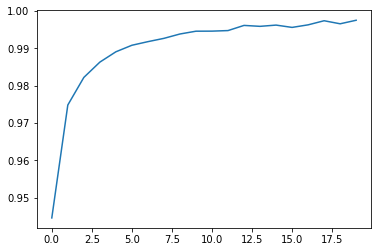

In [22]:
plt.plot(history.history['accuracy']);

### Accuracy of training and validation with loss

 And now let's plot the validation accuracy of the model, so I'm going to use the original accuracy, and I'm going to add the validation accuracy to the model here. So I'm going to type validation accuracy, and we can see that the accuracy of the training set is much higher than that of the evaluation data set, 

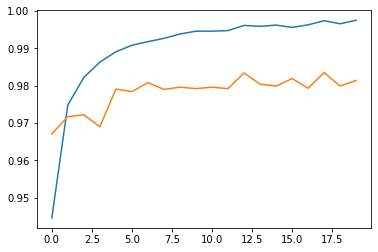

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy']);

 and now let's compare the accuracy of the training set, the accuracy of the validation set, and the loss of the model. So I'm going to copy the accuracy and the validation accuracy from the previous section, and I'm going to add the loss argument here. And we can see that the top line is the training accuracy, the second line, the orange line, is the validation accuracy, and finally, we can see that the bottom line there is the loss

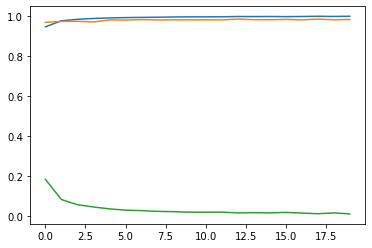

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss']);

## Evaluating the model

In [25]:
score = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1295 - accuracy: 0.9814


In [26]:
score

[0.12948429584503174, 0.9814000129699707]

 We can also check the accuracy of our model using the evaluate method. So we call our model, which is model.evaluate, and we use our test set, so x test and y test, and let's store this in the variable score. Now we can see that score is in fact a list, and it gives us the accuracy of our data as being 97.78% for our neural network model. And you can see that our model has an accuracy of about 97.78%, which is very good for a neural network model. 

## Experiment further
- What results do you get with a model with more than 2 hidden layers and more/less neurons.
- What results do you get when trying to use another activation function?
- Try a new dataset with your own neural network and see what accuracy you get.

In [27]:
model2 = Sequential()
model2.add(Dense(512, activation='relu', input_shape=(784,)))
model2.add(Dense(512, activation='relu'))
model2.add(Dense(256,activation='relu')) ### <----
model2.add(Dense(10,activation='softmax'))

In [28]:
model2.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 798,474
Trainable params: 798,474
Non-trainable params: 0
_________________________________________________________________


In [30]:
history2 = model2.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.1929 - accuracy: 0.9414 - val_loss: 0.1489 - val_accuracy: 0.9538
Epoch 2/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0895 - accuracy: 0.9723 - val_loss: 0.0928 - val_accuracy: 0.9725
Epoch 3/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0632 - accuracy: 0.9800 - val_loss: 0.0784 - val_accuracy: 0.9774
Epoch 4/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0510 - accuracy: 0.9839 - val_loss: 0.0901 - val_accuracy: 0.9740
Epoch 5/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0419 - accuracy: 0.9872 - val_loss: 0.0874 - val_accuracy: 0.9784
Epoch 6/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0349 - accuracy: 0.9892 - val_loss: 0.1079 - val_accuracy: 0.9734
Epoch 7/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0294 - accuracy: 0.9911 - val_loss: 0.0945 - val_ac

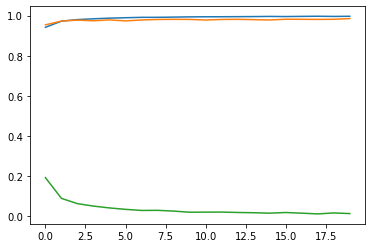

In [31]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history2.history['loss']);

In [32]:
score = model2.evaluate(X_test, y_test)
score

313/313 [==============================] - 1s 3ms/step - loss: 0.1101 - accuracy: 0.9849


[0.11007162183523178, 0.9848999977111816]

In [33]:
model3 = Sequential()
model3.add(Dense(512, activation='relu', input_shape=(784,)))
model3.add(Dense(512, activation='relu'))
model3.add(Dense(256, activation='relu')) ### <----
model3.add(Dense(128, activation='relu')) ### <----
model3.add(Dense(10,activation='softmax'))

In [34]:
model3.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [35]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1290      
Total params: 830,090
Trainable params: 830,090
Non-trainable params: 0
_________________________________________________________________


In [36]:
history3 = model3.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2049 - accuracy: 0.9385 - val_loss: 0.1073 - val_accuracy: 0.9663
Epoch 2/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0956 - accuracy: 0.9719 - val_loss: 0.1018 - val_accuracy: 0.9709
Epoch 3/20
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0705 - accuracy: 0.9789 - val_loss: 0.0792 - val_accuracy: 0.9766
Epoch 4/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0569 - accuracy: 0.9830 - val_loss: 0.0759 - val_accuracy: 0.9792
Epoch 5/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0451 - accuracy: 0.9869 - val_loss: 0.1019 - val_accuracy: 0.9742
Epoch 6/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0405 - accuracy: 0.9880 - val_loss: 0.0744 - val_accuracy: 0.9802
Epoch 7/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0349 - accuracy: 0.9896 - val_loss: 0.0853 - val_ac

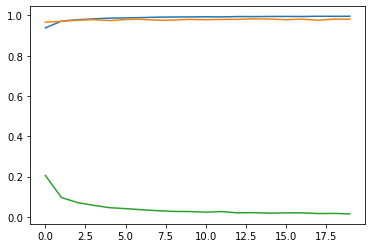

In [37]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.plot(history3.history['loss']);

In [38]:
score = model3.evaluate(X_test, y_test)
score

313/313 [==============================] - 1s 3ms/step - loss: 0.1472 - accuracy: 0.9815


[0.14716948568820953, 0.9815000295639038]

In [39]:
model21 = Sequential()
model21.add(Dense(512, activation='sigmoid', input_shape=(784,)))
model21.add(Dense(512, activation='sigmoid'))
model21.add(Dense(256,activation='sigmoid')) ### <----
model21.add(Dense(10,activation='softmax'))

model21.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model21.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                2570      
Total params: 798,474
Trainable params: 798,474
Non-trainable params: 0
_________________________________________________________________


In [40]:
history21 = model21.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3550 - accuracy: 0.8893 - val_loss: 0.1854 - val_accuracy: 0.9406
Epoch 2/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1415 - accuracy: 0.9569 - val_loss: 0.1130 - val_accuracy: 0.9653
Epoch 3/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0939 - accuracy: 0.9713 - val_loss: 0.0919 - val_accuracy: 0.9702
Epoch 4/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0694 - accuracy: 0.9781 - val_loss: 0.0822 - val_accuracy: 0.9738
Epoch 5/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0509 - accuracy: 0.9839 - val_loss: 0.0781 - val_accuracy: 0.9755
Epoch 6/20
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0400 - accuracy: 0.9871 - val_loss: 0.0937 - val_accuracy: 0.9726
Epoch 7/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0307 - accuracy: 0.9901 - val_loss: 0.0726 - val_ac

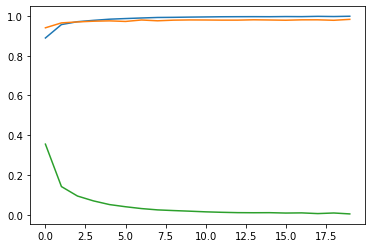

In [41]:
plt.plot(history21.history['accuracy'])
plt.plot(history21.history['val_accuracy'])
plt.plot(history21.history['loss']);

In [42]:
score = model21.evaluate(X_test, y_test)
score

313/313 [==============================] - 1s 4ms/step - loss: 0.0991 - accuracy: 0.9831


[0.09907624870538712, 0.9830999970436096]

In [43]:
model22 = Sequential()
model22.add(Dense(512, activation='tanh', input_shape=(784,)))
model22.add(Dense(512, activation='tanh'))
model22.add(Dense(256,activation='tanh')) ### <----
model22.add(Dense(10,activation='softmax'))

model22.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
model22.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_17 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_18 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                2570      
Total params: 798,474
Trainable params: 798,474
Non-trainable params: 0
_________________________________________________________________


In [44]:
history22 = model22.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3547 - accuracy: 0.8893 - val_loss: 0.1609 - val_accuracy: 0.9521
Epoch 2/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1392 - accuracy: 0.9570 - val_loss: 0.1255 - val_accuracy: 0.9615
Epoch 3/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0940 - accuracy: 0.9711 - val_loss: 0.1105 - val_accuracy: 0.9657
Epoch 4/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0673 - accuracy: 0.9792 - val_loss: 0.0806 - val_accuracy: 0.9752
Epoch 5/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0506 - accuracy: 0.9848 - val_loss: 0.0805 - val_accuracy: 0.9748
Epoch 6/20
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0385 - accuracy: 0.9878 - val_loss: 0.0806 - val_accuracy: 0.9757
Epoch 7/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0306 - accuracy: 0.9900 - val_loss: 0.0698 - val_ac

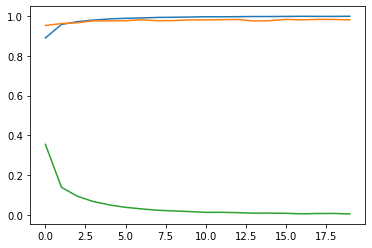

In [45]:
plt.plot(history22.history['accuracy'])
plt.plot(history22.history['val_accuracy'])
plt.plot(history22.history['loss']);

In [46]:
score = model22.evaluate(X_test, y_test)
score

313/313 [==============================] - 1s 2ms/step - loss: 0.1088 - accuracy: 0.9803


[0.10882866382598877, 0.9803000092506409]